# <strong>알고리즘 트레이딩
## <strong>통계 </strong>머신러닝을 활용한 시스템 개발

<br>
## <strong>1 통계
1. <strong>기술통계 : 표본</strong>을 추출하여 전체를 파악한다
  1.  <strong>$\bar{X}$ statistic (통계량)</strong> : 표본 평균
2. <strong>추론통계 : 부분</strong>을 통해서 전체를 추정
  1.  <strong>$\mu$ patameter(파라미터)</strong> : 모집단의 평균

<br>
## <strong> 01 기초통계
pandas_datareader

In [1]:
from pandas_datareader import get_data_yahoo, get_data_google

#get_data_google('KRX:005930',"2017-06-01").head(3)
df = get_data_yahoo('005930.KS',"2017-01-01")
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,203.000000
mean,2.250695e+06,2.273207e+06,2.233443e+06,2.254631e+06,2.243701e+06,230617.862069
std,2.576473e+05,2.586046e+05,2.532367e+05,2.563360e+05,2.612677e+05,83431.531114
min,1.799000e+06,1.803000e+06,1.777000e+06,1.778000e+06,1.762055e+06,0.000000
25%,2.035500e+06,2.070500e+06,2.032500e+06,2.052500e+06,2.037500e+06,177005.000000
50%,2.280000e+06,2.303000e+06,2.261000e+06,2.281000e+06,2.268144e+06,215146.000000
75%,2.409500e+06,2.431000e+06,2.386000e+06,2.412000e+06,2.400892e+06,268154.000000
max,2.875000e+06,2.875000e+06,2.809000e+06,2.861000e+06,2.861000e+06,523366.000000


### <strong> 02 표준편차
$ 표준편차 = \sqrt{\frac{분산}{크기}} $ : 평균근처의 데이터 밀집도 측정

### <strong> 03 사분위 수
<strong>범위 : 최댓값 - 최솟값

IQR (Interquartile Range : 2 ~ 3사분위 범위)</strong> : 데이터 구간분포 분석으로 많이 활용한다

<img src ="https://statsmethods.files.wordpress.com/2013/05/interquartile-range.gif" align="left">

In [2]:
df.quantile([0, .25, .5, .75])

,Open,High,Low,Close,Adj Close,Volume
0.00,1799000.0,1803000.0,1777000.0,1778000.0,1.762055e+06,0.0
0.25,2035500.0,2070500.0,2032500.0,2052500.0,2.037500e+06,177005.0
0.50,2280000.0,2303000.0,2261000.0,2281000.0,2.268144e+06,215146.0
0.75,2409500.0,2431000.0,2386000.0,2412000.0,2.400892e+06,268154.0


### <strong> 04 히스토그램
데이터의 분포를 그래프로 출력
1. <strong>bin</strong> : 데이터가 겹치지 않는 구간분할 간격
2. <strong>빈도</strong> : bin 구간에 속한 데이터 수

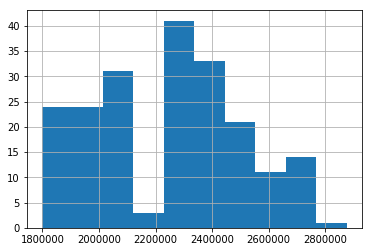

In [3]:
%matplotlib inline
df['Open'].hist()

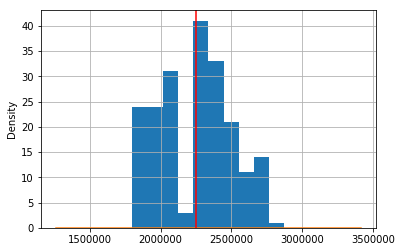

Bin : 1799000, Frequency = 24
Bin : 1906600, Frequency = 24
Bin : 2014200, Frequency = 31
Bin : 2121800, Frequency = 3
Bin : 2229400, Frequency = 41
Bin : 2337000, Frequency = 33
Bin : 2444600, Frequency = 21
Bin : 2552200, Frequency = 11
Bin : 2659800, Frequency = 14
Bin : 2767400, Frequency = 1


In [4]:
import matplotlib.pyplot as plt

(n, bins, _) = plt.hist(df['Open'])   #.hist : 구간별 bins 와 n(구간분포 데이터 수) 를 추출
df['Open'].plot(kind='kde')
plt.axvline(df['Open'].mean(),color='red')  # 중간값 보조선을 그린다
plt.grid(); plt.show()

for index in range(len(n)):
    print ("Bin : %0.f, Frequency = %0.f" %(bins[index],n[index]) )

In [5]:
# 히스토그램 분석내용
# 1.중심성향 (Central Tendency) : 평균을 중심으로 분포여부
# 2.Modes : 무리의 설정여부
# 3.Spread : 데이터 분포
# 4.Tail : 상/하위 25% 분포의 기울기 경사정도
# 5.이상치 : 예외값이 분포도에 존재하는가

# 결과 : # 중심성향이 상당히 높다

### <strong> 05 정규분포
1. <strong>Normal Distribution</strong> : 다른이름으로 <strong>Gaussian Distribution (가우스 분포)</strong>라 한다
2. <strong>Standard Normal Distribution (표준정규분포)</strong> : 평균 0, 분산 1인 정규분포

Gaussian Distribution (가우스분포) : 물리학 실험시 발생한 계측오차를 확률분포로 정리

Central Limit Theorem (중심극한정리) : N이 적당히 크면, 동일한 확률분포의 독립변수의 평균값이 정규분포에 가까워 진다

### <strong> 06 산점도
<strong>Scatter plot</strong> : 2개의 변수 데이터를 직교좌표를 활용하여 상관성을 분석한다

단 상관성이 바로 <strong>Causation(인과관계)를 의미하지 않음</strong>에 주의

<strong>산점도 행렬</strong> : 데이터 컬럼이 여럿인 경우, 2개씩 짝지어서 비교하면 용이하다

In [6]:
df = df.astype(int)

In [7]:
from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
# plt.show()

### <strong> 07 상자그림
<strong>Box plot</strong>
1. Whisker : 상단/ 하단경계
2. Mean(평균), Median(중간), Quartile(1,3분위 경계)
3. 이상치 데이터

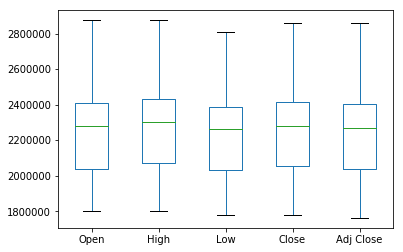

In [8]:
df.ix[:,:-1].plot(kind='box')
plt.show()

# 분석결과
# 모든 컬럼에는 이상치 값을 나타내지 않는다

<br>
## <strong>2 시계열 데이터
<strong>Financial Time Series
1. 자기상관 AutoCorrelation
2. 자기공분산 AutoCovariance

### <strong>01 시계열 데이터 분석
1. 시계열 데이터 패턴에 영향을 미치는 요소를 찾는다
2. 과거의 데이터가 미래에 영향을 미치는지 분석한다
3. 모델로 미래의 데이터를 예측한다

### <strong>02 시계열 데이터 특성
1. Trend : 시간의 흐름에 따른 변화
2. Seasonality : 일,월,년,계절에 따른 반복적 pattern
3. Outliers : 이상치 발견
4. Long-run Cycle : 별도의 pattern 반복구간
5. Constant Variance : 측정값의 변동
6. Abrupt Change : 급격한 변화여부

### <strong>03 랜덤과정
1. Stochastic Process(랜덤과정) : 시간의 흐름에 따른 데이터의 변화 ex) 환율변화, 주식가격 변화
2. Deterministic Process(결정적과정) : 모든 데이터 값은 결정이 되어 있다

### <strong>04 정상 시계열 데이터
평균 0기준 <strong>+-5</strong> 사이에서 변동 : <strong>통계적 특성을 찾기 용이</strong> (주식가격은 정상성을 갖기 어렵다)
1. Weak-sense stationarity (약한 정상성) : 평균함수 (mean(t))와 공분산함수 (r(s,t))가 시간에 대해 변하지 않음
  1. 일정한 평균
  2. 일정한 분산
  3. 시간에 독립적인 공분산
  4. $ f(t_1) = f(t_1 + T) $ : T 시간의 변화에 상관없이 통계적 특성을 갖는다

### <strong>05 랜덤과정에서의 기대값, 분산, 공분산
$E(x) = \mu$ :  (모집단 확률변수 x 의 기대값) = (모집단 평균)

In [9]:
# 한미약품 데이터 추출
df_hanmi = get_data_yahoo('128940.KS','2017-01-01')
df_hanmi = df_hanmi.astype(int)

# 종가간의 공분산을 측정
# 공분산은 값보단, 양/음수 방향성이 중요하다 (같은 방향으로 움직인다)
df['Close'].cov(df_hanmi['Close'])

14865752193.508265

### <strong>06 상관분석
피어슨, 스피어만, 켄달 방식

In [10]:
df['Close'].corr(df_hanmi['Close'])

0.9101523089405944

### <strong>07 자기공분산
Auto_Covariance : 상관도표에 근거를 둔 안정성 검정으로, $Log$의 추세와 크기를 파악에 용이

cf)공분산이 실제시간 아닌, 시차에만 의존시 안정적

https://m.blog.naver.com/PostView.nhn?blogId=someonenice&logNo=10099260876&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F

### <strong>08 자기상관
Auto_Correlation : 시간 변화에 따른 변수간의 상관관계 변화를 측정

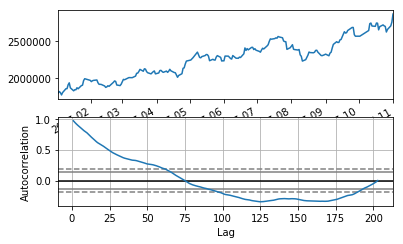

In [11]:
# 종가의 자기상관 그래프 출력
# 분석결과 : 데이터의 무작위성을 파악가능하다 (Randomness)
#        : 데이터가 0에 가까울수록 자기상관성을 강하게 나타낸다

from pandas.tools.plotting import autocorrelation_plot

fig, axs = plt.subplots(2,1)
df['Close'].plot(ax = axs[0])
autocorrelation_plot(df['Close'], ax = axs[1])
plt.show()

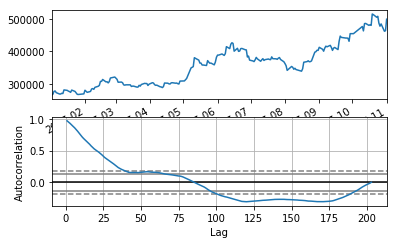

In [12]:
fig, axs = plt.subplots(2,1)
df_hanmi['Close'].plot(ax = axs[0])
autocorrelation_plot(df_hanmi['Close'], ax = axs[1])
plt.show()

### <strong>09 상광도표
correlogram : 자기상관함수를 Lag K의 순차적 값에 따른 자기상관도를 출력한다

In [13]:
def get_autocorrelation_dataframe(series):
    def r(h):
        return ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)
    x = np.arange(n) + 1
    y = lmap(r, x)
    df = pd.DataFrame(y, index=x)
    return df

In [17]:
import numpy as np
import pandas as pd
from pandas.compat import lmap

df_corr = get_autocorrelation_dataframe(df['Close'])
df_corr.describe()

,0
count,203.000000
mean,-0.002463
std,0.358245
min,-0.344759
25%,-0.299548
50%,-0.143085
75%,0.265623
max,0.969722


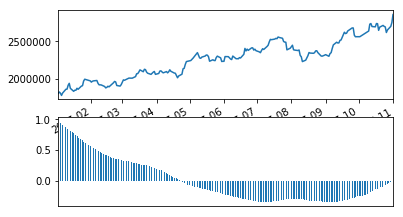

In [15]:
fig, axs = plt.subplots(2,1)

axs[1].xaxis.set_visible(False) 
df['Close'].plot(ax=axs[0])
df_corr[0].plot(kind='bar',ax=axs[1])
plt.show()

# 자기상관 그래프와 형태만 약간 다를뿐, 결과적으로 같은 결과를 출력한다

### <strong>10 Random Walk
평균은 일정하지만, 방향이 무작위로 결정되어 시간이 흐를수록 분산이 증가

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_Walk_example.png" align="left" width="250">

### <strong>11 기하적 브라운 운동 GBM
Geomatric Brownian Motion, Exponential Brownian Motion : 랜덤워크의 일종으로 표류하는 브라운 운동
1. 표류하는 랜덤위크
2. 정상과정 (평균 +-5 이내로 변동)
3. 랜덤워크 

<img src="http://images.slideplayer.com/31/9706941/slides/slide_18.jpg" align="left" width="500">